# Deep Learning with PyTorch




### Import all assets

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch


import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F

# Custom DataSet
from data import iris
from data import helper

In [2]:
# Get the datasets
iris_data_file = 'data/sand.txt'
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))


train_loader = torch.utils.data.DataLoader(dataset=test_ds, batch_size= 1, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=1, shuffle=True)
dataiter = iter(train_loader)
images, labels = dataiter.next()
m = images.mean()
s = images.std()
#images = (images - m)/s
print(images)
print(labels)



# instances in training set:  1
# instances in testing/validation set:  293
tensor([[-0.6500, -0.1400, -0.8200,  0.7100, -0.6500,  0.9900, -0.6500,  0.5400,
         -0.9900, -0.1400]])
tensor([1])


### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [3]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
            drop_p: float between 0 and 1, dropout probability
        '''
        super().__init__()
        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        
        x = self.output(x)

        return F.log_softmax(x, dim=1)



**Print the module**

In [4]:
# Create the network, define the criterion and optimizer
model = Network(10, 10, [ 128,64 ,64,16], drop_p=0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Create the DataLoader

### Instantiate the network, the loss function and the optimizer

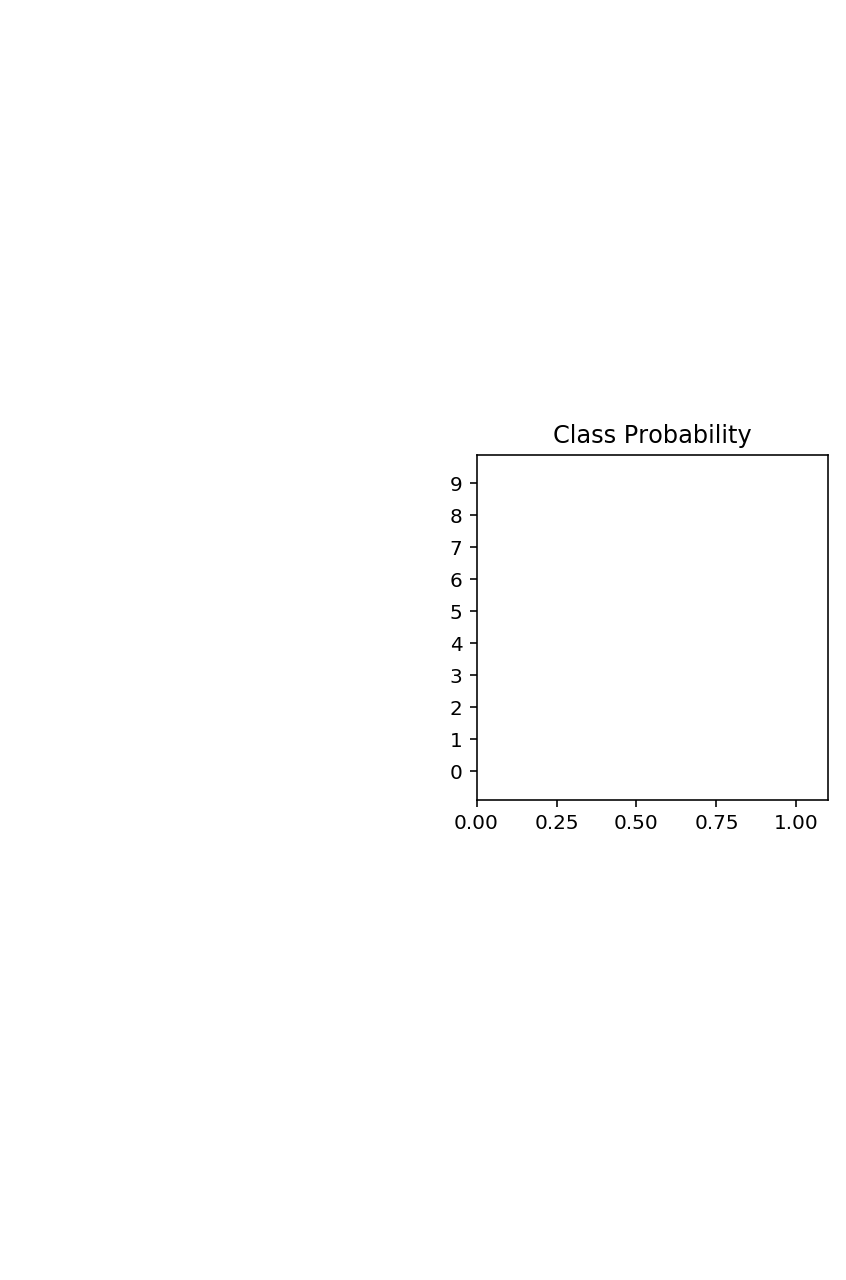

In [5]:
# Grab some data
dataiter = iter(train_loader)
images, labels = dataiter.next()

images.resize_(1, 1,10)

img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(ps)

### Train it!

Plot loss vs iterations

### Savign the model to disk, and loading it back

In [6]:
epochs = 300
print_every = 800
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(train_loader):
        
        #m = images.mean()
        #images = (images - m)/ s
        #print(images)
        #print(labels)
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 10)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
        
        
print(steps)

Epoch: 3/300...  Loss: 0.4928
Epoch: 6/300...  Loss: 0.3036
Epoch: 9/300...  Loss: 0.1220
Epoch: 11/300...  Loss: 0.5788
Epoch: 14/300...  Loss: 0.4054
Epoch: 17/300...  Loss: 0.2361
Epoch: 20/300...  Loss: 0.0688
Epoch: 22/300...  Loss: 0.5134
Epoch: 25/300...  Loss: 0.3512
Epoch: 28/300...  Loss: 0.1795
Epoch: 31/300...  Loss: 0.0210
Epoch: 33/300...  Loss: 0.4580
Epoch: 36/300...  Loss: 0.2907
Epoch: 39/300...  Loss: 0.1244
Epoch: 41/300...  Loss: 0.5548
Epoch: 44/300...  Loss: 0.4003
Epoch: 47/300...  Loss: 0.2346
Epoch: 50/300...  Loss: 0.0850
Epoch: 52/300...  Loss: 0.5024
Epoch: 55/300...  Loss: 0.3449
Epoch: 58/300...  Loss: 0.1877
Epoch: 61/300...  Loss: 0.0357
Epoch: 63/300...  Loss: 0.4458
Epoch: 66/300...  Loss: 0.3042
Epoch: 69/300...  Loss: 0.1398
Epoch: 71/300...  Loss: 0.5514
Epoch: 74/300...  Loss: 0.4018
Epoch: 77/300...  Loss: 0.2418
Epoch: 80/300...  Loss: 0.1021
Epoch: 82/300...  Loss: 0.5111
Epoch: 85/300...  Loss: 0.3482
Epoch: 88/300...  Loss: 0.2000
Epoch: 91/3

tensor([[3.4122e-01, 1.9140e-01, 1.7275e-01, 3.1717e-02, 5.2425e-02, 2.0843e-01,
         1.7703e-09, 1.8926e-09, 2.0525e-03, 2.0100e-09]])
tensor([5])


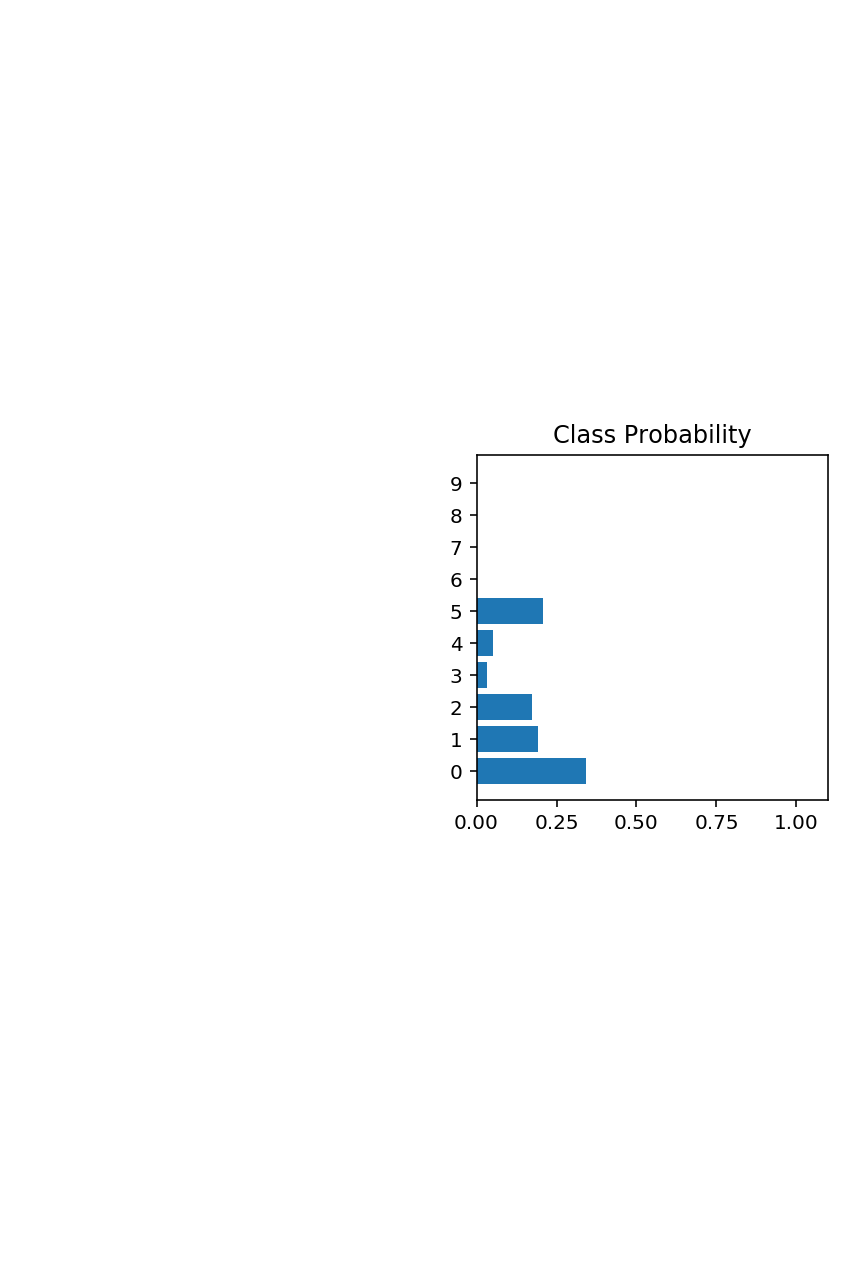

In [35]:
images, labels = next(iter(train_loader))
x = torch.FloatTensor([[-0.99,0.03,-0.82,0.88,-0.48,0.54,-0.99,0.54,-0.48,-0.14]])

img = images

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
    


# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

helper.view_classify(ps)
print(ps)
print(labels)

